In [1]:
#import dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
file = r'D:\Project_telecommunication_churn\churn.csv'
tele_data = pd.read_csv(file,encoding='latin')
tele_data.sample(5)

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
2689,2690,KS,area_code_415,79,no,0,no,15.2,8,4.10,...,83,30.24,167.3,84,14.22,223.7,142,10.07,0,no
733,734,NM,area_code_408,85,yes,37,no,9.5,8,2.57,...,123,39.03,132.3,90,11.25,211.9,76,9.54,2,no
459,460,WA,area_code_415,109,no,0,no,11.0,3,2.97,...,120,31.28,120.4,119,10.23,153.7,86,6.92,0,no
2087,2088,NE,area_code_408,105,no,0,no,11.1,8,3.00,...,99,27.59,212.5,95,18.06,214.7,114,9.66,4,no
2203,2204,PA,area_code_510,97,no,0,yes,11.0,2,2.97,...,103,24.65,294.3,93,25.02,239.8,120,10.79,4,yes


# Exploratory Data Analysis & Data Cleaning

In [3]:
#first five records
tele_data.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [4]:
#last five records
tele_data.tail()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no
4999,5000,VT,area_code_415,86,yes,34,no,9.3,16,2.51,...,102,22,267.1,104,22.70,154.8,100,6.97,0,no


In [5]:
#columns/features
tele_data.columns.values

array(['Unnamed: 0', 'state', 'area.code', 'account.length', 'voice.plan',
       'voice.messages', 'intl.plan', 'intl.mins', 'intl.calls',
       'intl.charge', 'day.mins', 'day.calls', 'day.charge', 'eve.mins',
       'eve.calls', 'eve.charge', 'night.mins', 'night.calls',
       'night.charge', 'customer.calls', 'churn'], dtype=object)

In [6]:
#data information
tele_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [7]:
'''#drop unwanted columns : 'Unnamed 0'
df = tele_data.drop(columns = ['Unnamed: 0'])
df.sample()'''
df = tele_data.copy()

In [8]:
#data types of all columns
df.dtypes

Unnamed: 0          int64
state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge         object
eve.mins           object
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

**Here, we observe that 7 attributes have 'object' datatype.The datatype of the attributes 'day_charge','eve_mins' should be converted from object to float64.**

In [9]:
#Converting data types from object to float
df['day.charge'] = pd.to_numeric(df['day.charge'],errors='coerce')
df['eve.mins'] = pd.to_numeric(df['eve.mins'],errors='coerce')

In [10]:
#data description
df.describe()

,Unnamed: 0,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4993.000000,4976.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,30.653501,200.580326,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,1443.520003,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,9.166356,50.554637,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,166.275000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,2500.500000,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,3750.250000,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,5000.000000,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [11]:
#shape of dataset
df.shape

(5000, 21)

**After removing unneccesory column there are 5000 records/rows and 20 features/columns in dataset**

In [12]:
#check for null values
df.isnull().values.any()

True

In [13]:
df.isna().sum()

Unnamed: 0         0
state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

**Dealing with missing values : There are total 31 na values. While dealing with those need to check we'll not miss any important information. Dropping these value is not suitable so replacing with mean values is the best option.**

In [14]:
#Calculate mean for particular columns
day_crg_mean = np.mean(df['day.charge'])
eve_min_mean = np.mean(df['eve.mins'])

#replace values
df['day.charge'] = df['day.charge'].fillna(day_crg_mean)
df['eve.mins'] = df['eve.mins'].fillna(eve_min_mean)

In [15]:
df.isna().values.any()

False

In [16]:
#check for duplicates
df.duplicated().sum()

0

**There are no duplicate values in dataset**

In [17]:
'''# check unique values of each column
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))'''

"# check unique values of each column\nfor column in df.columns:\n    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))"

In [18]:
#unique values in target column
df['churn'].unique()

array(['no', 'yes'], dtype=object)

In [19]:
#value counts for churn
df['churn'].value_counts()

no     4293
yes     707
Name: churn, dtype: int64

**Hence, 4293 people are continuing the service with company and remaining 707 discontinued**

In [20]:
#value counts for intl.plan
df['intl.plan'].value_counts()

no     4527
yes     473
Name: intl.plan, dtype: int64

**Hence, there are very few customers opted for international plan i.e. 473**

In [21]:
#value counts for voice.plan
df['voice.plan'].value_counts()

no     3677
yes    1323
Name: voice.plan, dtype: int64

**Here, people opted for voice plan are 1323 and people with no voice plan are 3677**

In [22]:
#unique values of each column
df.nunique()

Unnamed: 0        5000
state               51
area.code            3
account.length     218
voice.plan           2
voice.messages      48
intl.plan            2
intl.mins          170
intl.calls          21
intl.charge        170
day.mins          1961
day.calls          123
day.charge        1962
eve.mins          1877
eve.calls          126
eve.charge        1659
night.mins        1853
night.calls        131
night.charge      1028
customer.calls      10
churn                2
dtype: int64

# Data Visualization

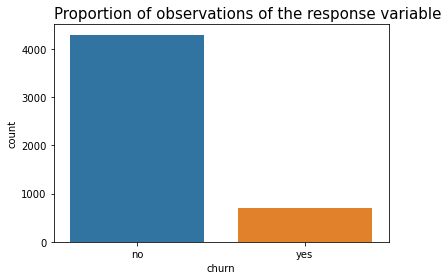

In [23]:
#response variable
sns.countplot(x=df['churn'])
plt.title('Proportion of observations of the response variable',
             fontsize=15, loc='left')
#plt.xlable('Churn',fontsize=12)
#plt.title('Churn Distribution')
plt.show()

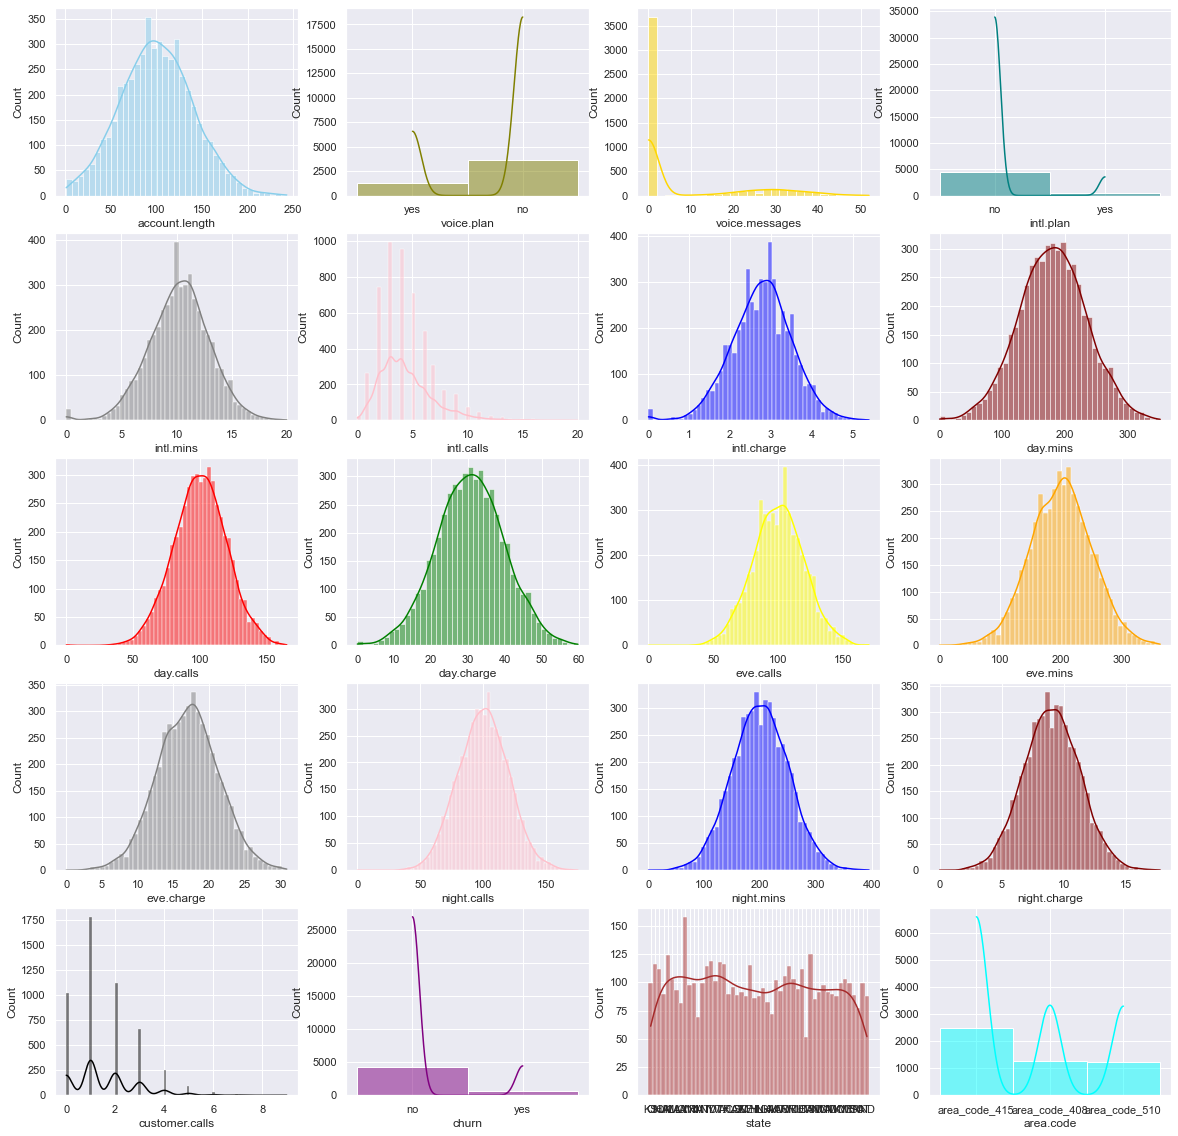

In [24]:
#df.hist(figsize=(15,15))
#plt.show()

sns.set(style=('darkgrid'))
fig, axs = plt.subplots(5, 4, figsize=(20, 20))
sns.histplot(data=df, x='account.length', kde=True, color='skyblue', ax=axs[0,0])
sns.histplot(data=df, x='voice.plan', kde=True, color='olive', ax=axs[0,1])
sns.histplot(data=df, x='voice.messages', kde=True, color='gold', ax=axs[0,2])
sns.histplot(data=df, x='intl.plan', kde=True, color='teal', ax=axs[0,3])
sns.histplot(data=df, x='intl.mins', kde=True, color='grey', ax=axs[1,0])
sns.histplot(data=df, x='intl.calls', kde=True, color='pink', ax=axs[1,1])
sns.histplot(data=df, x='intl.charge', kde=True, color='blue', ax=axs[1,2])
sns.histplot(data=df, x='day.mins', kde=True, color='maroon', ax=axs[1,3])
sns.histplot(data=df, x='day.calls', kde=True, color='red', ax=axs[2,0])
sns.histplot(data=df, x='day.charge', kde=True, color='green', ax=axs[2,1])
sns.histplot(data=df, x='eve.calls', kde=True, color='yellow', ax=axs[2,2])
sns.histplot(data=df, x='eve.mins', kde=True, color='orange', ax=axs[2,3])
sns.histplot(data=df, x='eve.charge', kde=True, color='grey', ax=axs[3,0])
sns.histplot(data=df, x='night.calls', kde=True, color='pink', ax=axs[3,1])
sns.histplot(data=df, x='night.mins', kde=True, color='blue', ax=axs[3,2])
sns.histplot(data=df, x='night.charge', kde=True, color='maroon', ax=axs[3,3])
sns.histplot(data=df, x='customer.calls', kde=True, color='black', ax=axs[4,0])
sns.histplot(data=df, x='churn', kde=True, color='purple', ax=axs[4,1])
sns.histplot(data=df, x='state', kde=True, color='brown', ax=axs[4,2])
sns.histplot(data=df, x='area.code', kde=True, color='aqua', ax=axs[4,3])
plt.show()

**Hence, as per above observation we can say that almost all the attributes are normally distributed except 'customer.calls' and 'intl.call' are slightly skewed towards right.**

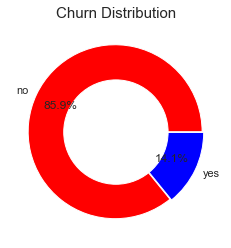

In [25]:
'''my_expld = [0,0.2]
lbl = ['no','yes']
plt.pie(df['churn'].value_counts(),explode = my_expld, labels=lbl, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Data')
plt.show()'''

#Churn Distribution
clrs = ['#FF0000','#0000FF']
lbls = ['no','yes']
expld = (0.01,0.01)

plt.pie(df['churn'].value_counts(),colors = clrs,labels = lbls,autopct = '%1.1f%%',pctdistance = 0.70,explode = expld)

# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
 
plt.title('Churn Distribution',fontsize=15)
plt.show()

**With the help of above chart we can say that there are 14.1% people are leaving the company and remaining 85.9% continuing the services with company.**

In [26]:
churned = df[df['churn']=='yes']
not_churned = df[df['churn']=='no']

print('percentage of churned customer: {}'.format(churned.shape[0]/df.shape[0]))
print('percentage of not-churned customer: {}'.format(not_churned.shape[0]/df.shape[0]))

percentage of churned customer: 0.1414
percentage of not-churned customer: 0.8586


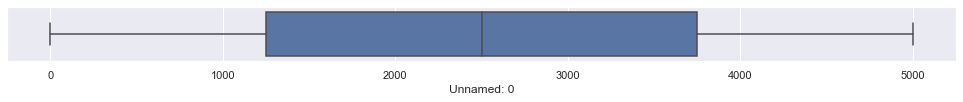

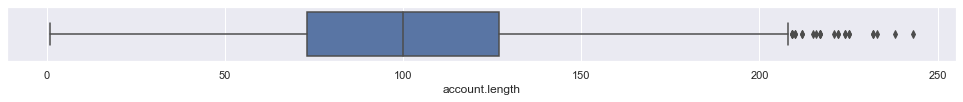

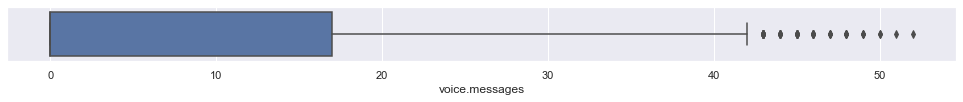

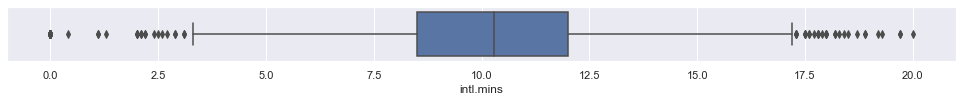

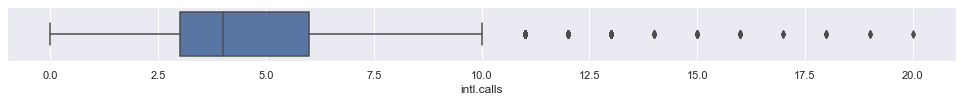

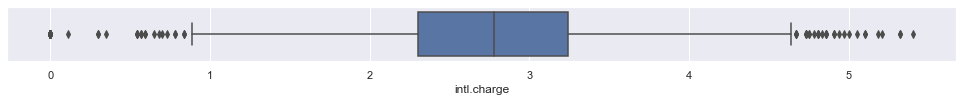

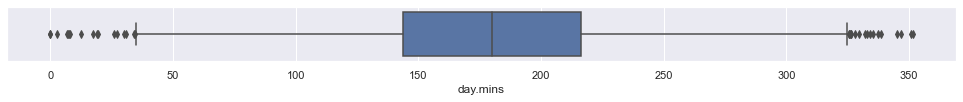

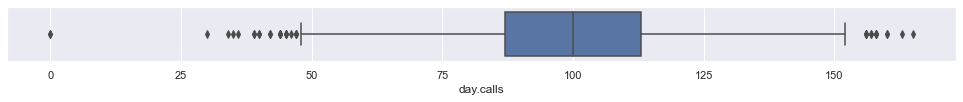

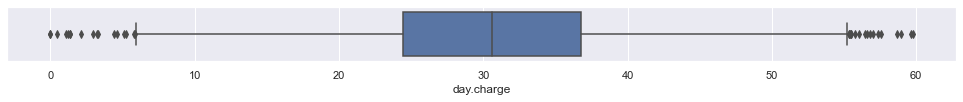

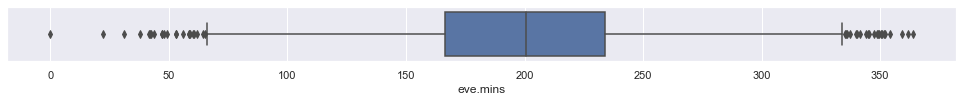

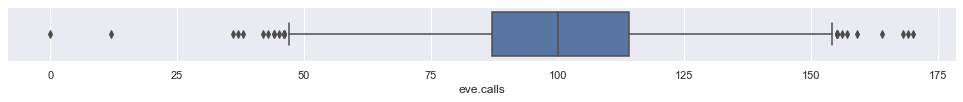

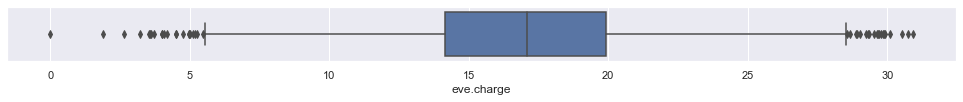

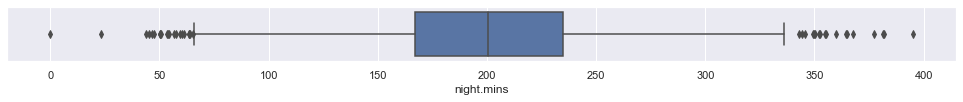

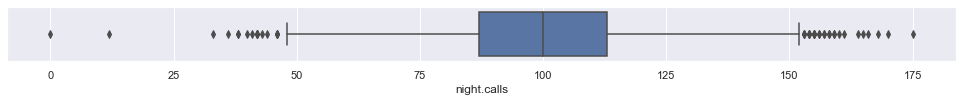

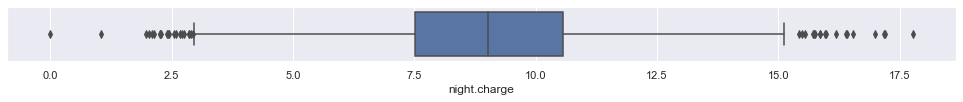

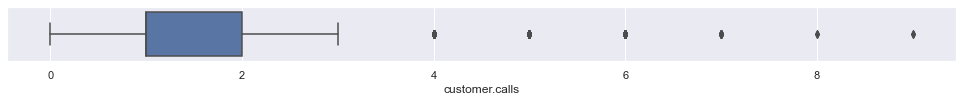

In [27]:
#Printing boxplot for each numerical column present in the data set
df_boxplot = df.select_dtypes(exclude=['object','bool'])
for column in df_boxplot:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)
plt.show()

**With the help of above boxplots we can say that there are outliers in dataset**

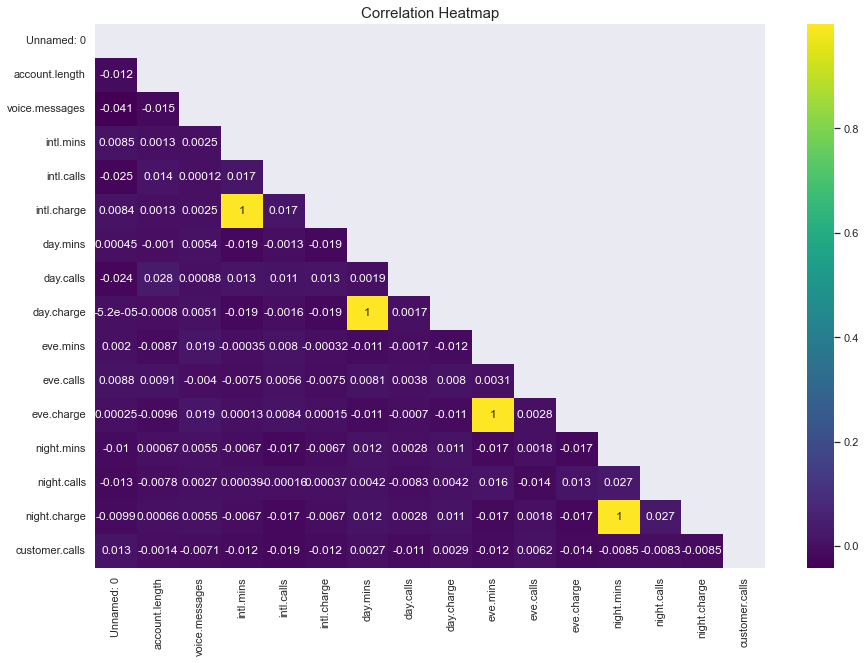

In [28]:
#Correlation
plt.figure(figsize=(15,10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='viridis')
plt.title('Correlation Heatmap',fontsize=15)
plt.show()

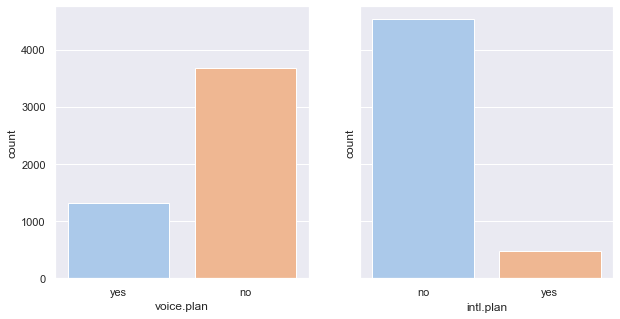

In [29]:
#customer plan
with sns.color_palette("pastel"):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
    sns.countplot("voice.plan", data=df, ax=axes[0])
    sns.countplot("intl.plan", data=df, ax=axes[1])

**With the above graphs we can say that, the people opted for international plan are less as compare to voice plan.**

In [30]:
import math
def percentage_stacked_plot(columns_to_plot,super_title):
    no_of_cols = 2
    no_of_rows = math.ceil(len(columns_to_plot)/2)
    
    #figure
    fig = plt.figure(figsize=(12, 5 * no_of_rows)) 
    fig.suptitle(super_title, fontsize=20,  y=.98)
    
    #subplot
    for index, column in enumerate(columns_to_plot, 1):
        
        ax = fig.add_subplot(no_of_rows, no_of_cols, index)
        
        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df[column], df['churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['springgreen','salmon'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=14, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

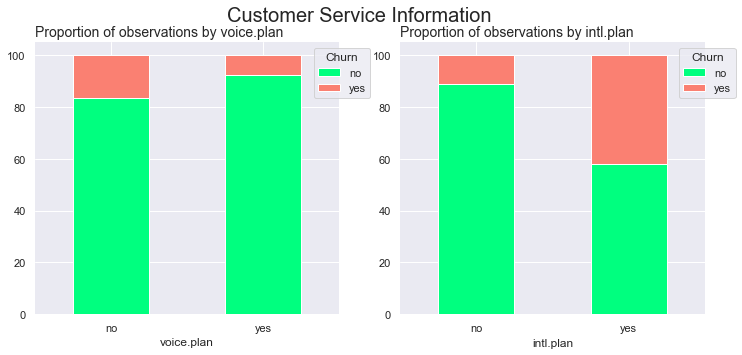

In [31]:
# plan V/s Churn
services = ['voice.plan', 'intl.plan']

# stacked plot of demographic columns
percentage_stacked_plot(services, 'Customer Service Information')

**The people who have taken the international plan are more likely to discontinue the company and churn rate is more in this case.**

In [32]:
#unique values of state
df['state'].value_counts()

WV    158
MN    125
AL    124
ID    119
VA    118
OH    116
TX    116
WY    115
NY    114
OR    114
NJ    112
UT    112
WI    106
MI    103
ME    103
MA    103
MD    102
VT    101
MT     99
RI     99
KY     99
MS     99
CT     99
KS     99
WA     98
IN     98
CO     96
NH     95
DE     94
MO     93
AR     92
NM     91
NC     91
SC     91
FL     90
NV     90
OK     90
TN     89
AZ     89
DC     88
IL     88
NE     88
ND     88
HI     86
SD     85
GA     83
LA     82
PA     77
AK     72
IA     69
CA     52
Name: state, dtype: int64

In [33]:
#label encoding (label_encoder object knows how to understand word labels.)
#Convertin the predictor variable in a binary numeric variable
from sklearn import preprocessing
label_enc = preprocessing.LabelEncoder()
df['churn'] = label_enc.fit_transform(df['churn'])
df['voice.plan'] = label_enc.fit_transform(df['voice.plan'])
df['intl.plan'] = label_enc.fit_transform(df['intl.plan'])

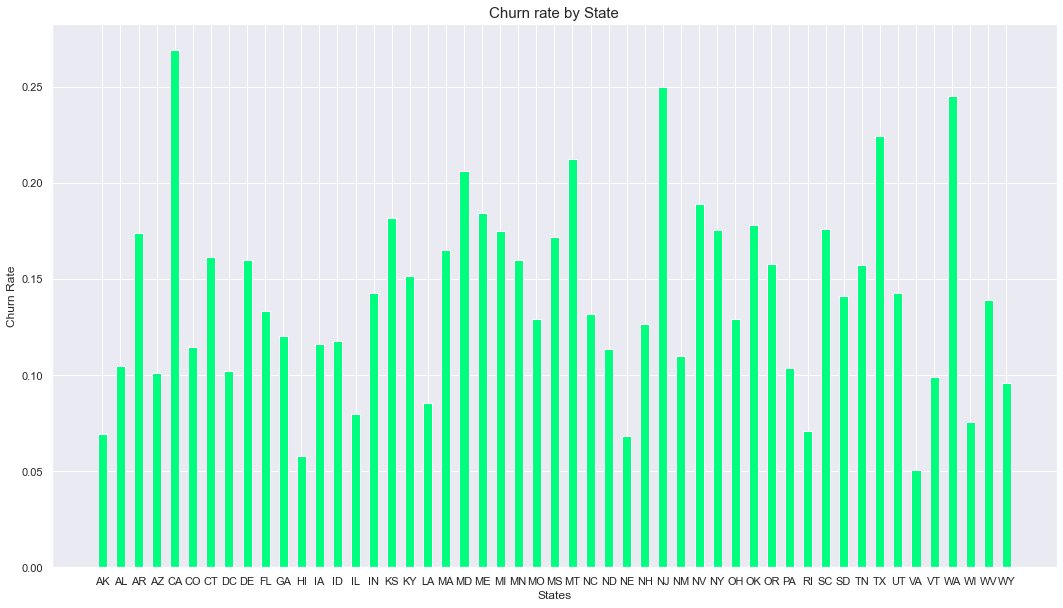

In [34]:
plot_by_state = df.groupby('state').churn.mean().reset_index()
x = plot_by_state['state']
y = plot_by_state['churn']

fig = plt.figure(figsize=(18,10))

plt.bar(x,y,color='springgreen',width=0.5)

plt.xlabel("States")
plt.ylabel("Churn Rate")
plt.title("Churn rate by State",fontsize=15)

sns.set(style='darkgrid')

plt.show()

In [35]:
state_data = pd.crosstab(df['state'],df['churn'])
state_data['Churn_%'] = state_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
state_data.head()

churn,0,1,Churn_%
state,,,
AK,67,5,6.944444
AL,111,13,10.483871
AR,76,16,17.391304
AZ,80,9,10.112360
CA,38,14,26.923077


In [36]:
print('Highest churning State : ',np.max(state_data['Churn_%']))
print('Lowest churning state : ',np.min(state_data['Churn_%']))

Highest churning State :  26.923076923076923
Lowest churning state :  5.084745762711864


In [37]:
Sorted_SD = state_data.sort_values('Churn_%')
# Five Least churning states
Sorted_SD.head()

churn,0,1,Churn_%
state,,,
VA,112,6,5.084746
HI,81,5,5.813953
NE,82,6,6.818182
AK,67,5,6.944444
RI,92,7,7.070707


In [38]:
# Five highest churning states
Sorted_SD.tail()

churn,0,1,Churn_%
state,,,
MT,78,21,21.212121
TX,90,26,22.413793
WA,74,24,24.489796
NJ,84,28,25.000000
CA,38,14,26.923077


In [39]:
df['area.code'].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

area_code_415    2495
area_code_408    1259
area_code_510    1246
Name: area.code, dtype: int64

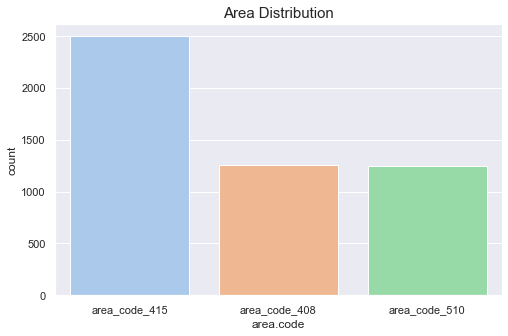

In [40]:
with sns.color_palette("pastel"):
    fig, axes = plt.subplots(1, 1, figsize=(8,5), sharey=True)
    sns.countplot("area.code", data=df)
    plt.title('Area Distribution',fontsize=15)
    
df['area.code'].value_counts()

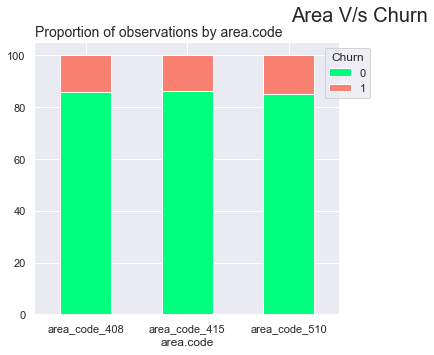

In [41]:
area_code = ['area.code']

# stacked plot of area code
percentage_stacked_plot(area_code, 'Area V/s Churn')

**Hence, there is not that much of difference or fluctuations in churn rate when it comes to area.**

In [42]:
def histogram_plots(columns_to_plot, super_title):

    # set number of rows and number of columns
    no_of_cols = 2
    no_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * no_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(no_of_rows, no_of_cols, index)

        # histograms for each class (normalized histogram)
        df[df['churn']==0][column].plot(kind='hist', ax=ax, density=True, 
                                                       alpha=0.5, color='springgreen', label='No')
        df[df['churn']==1][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, color='salmon', label='Yes')
        
        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
        

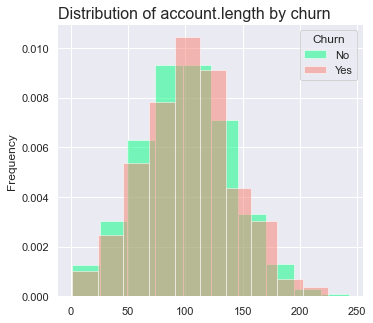

In [43]:
# customer account column names
account_columns_numeric = ['account.length']
# histogram of costumer account columns 
histogram_plots(account_columns_numeric, '')

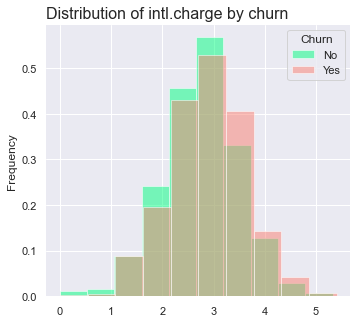

In [44]:
# customer account column names
account_columns_numeric = ['intl.charge']
# histogram of costumer account columns 
histogram_plots(account_columns_numeric, '')

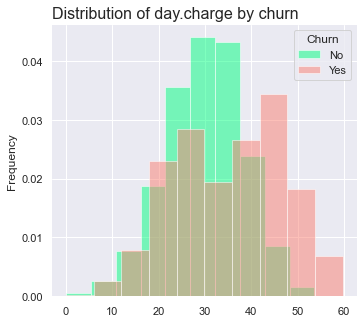

In [45]:
# customer account column names
account_columns_numeric = ['day.charge']
# histogram of costumer account columns 
histogram_plots(account_columns_numeric, '')

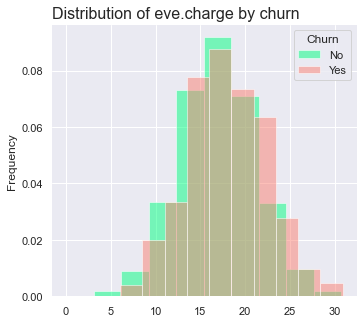

In [46]:
# customer account column names
account_columns_numeric = ['eve.charge']
# histogram of costumer account columns 
histogram_plots(account_columns_numeric, '')

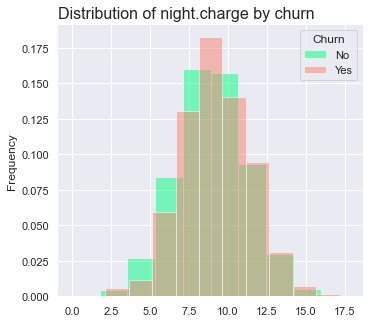

In [47]:
# customer account column names
account_columns_numeric = ['night.charge']
# histogram of costumer account columns 
histogram_plots(account_columns_numeric, '')

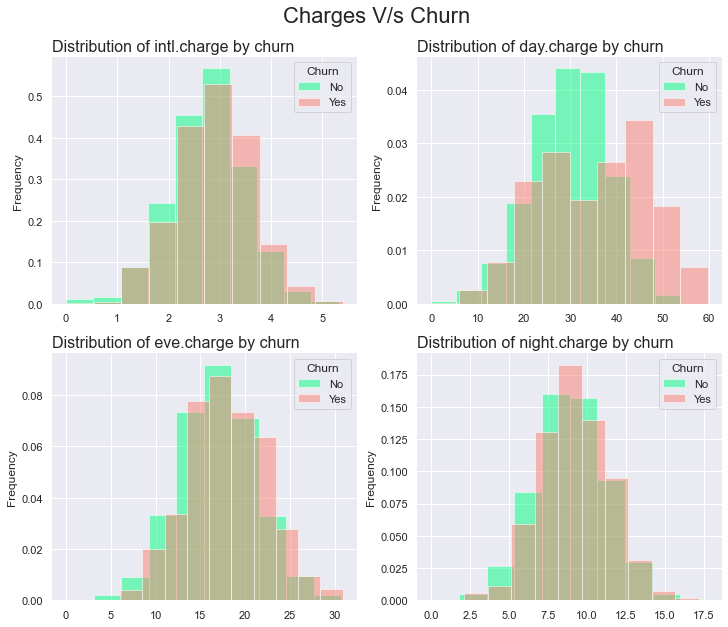

In [48]:
# customer account column names
account_columns_numeric = ['intl.charge','day.charge','eve.charge','night.charge']
# histogram of costumer account columns 
histogram_plots(account_columns_numeric, 'Charges V/s Churn')

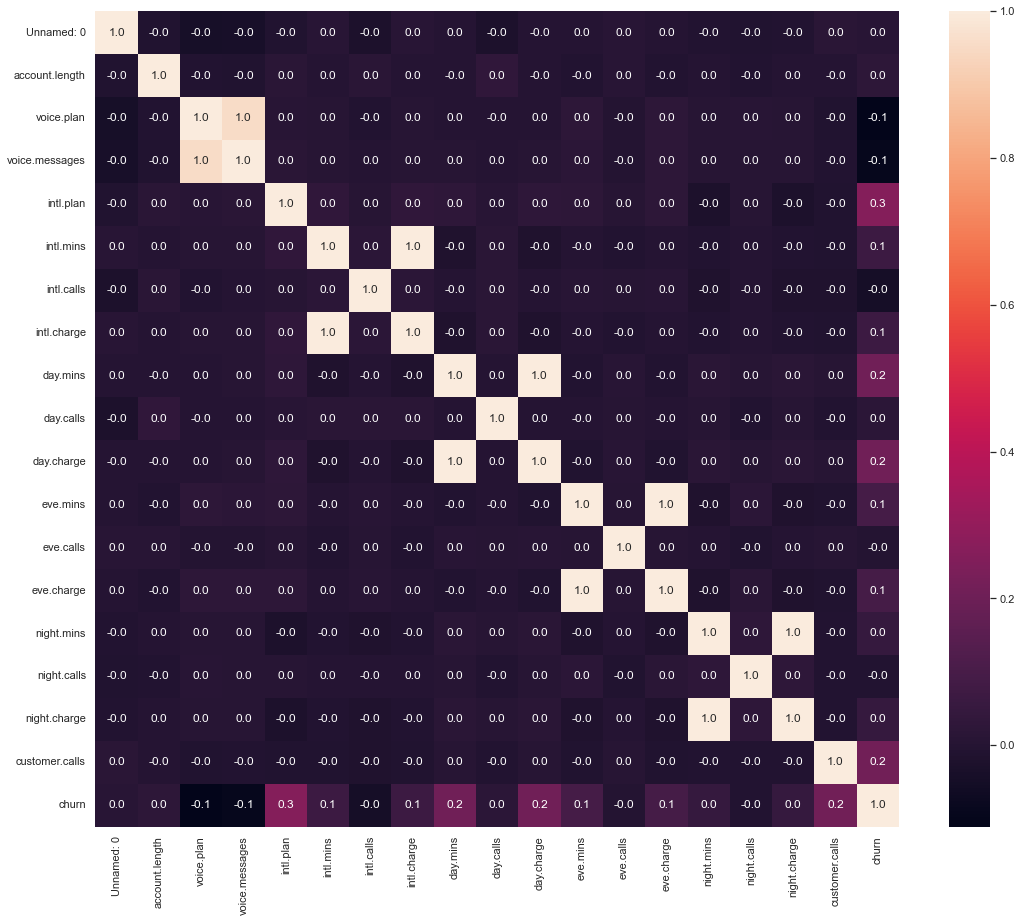

In [49]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

Hence, Correlation is 1 between folowing variables

intl.mins & intl.charges

day.mins & day.charges

eve.mins & eve.charges

night.mins & night.charges

So, we can remove 4 of total variables from these 8.

In [50]:
'''plt.figure(figsize=(18,10))
sns.scatterplot(x='eve.calls',y='churn',hue='churn',data=df)
plt.show()'''

"plt.figure(figsize=(18,10))\nsns.scatterplot(x='eve.calls',y='churn',hue='churn',data=df)\nplt.show()"

In [51]:
df

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,1,25,0,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,2,OH,area_code_415,107,1,26,0,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,3,NJ,area_code_415,137,0,0,0,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,4,OH,area_code_408,84,0,0,1,6.6,7,1.78,...,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,5,OK,area_code_415,75,0,0,1,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,1,40,0,9.9,5,2.67,...,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0
4996,4997,WV,area_code_415,152,0,0,0,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,1
4997,4998,DC,area_code_415,61,0,0,0,13.6,4,3.67,...,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0
4998,4999,DC,area_code_510,109,0,0,0,8.5,6,2.30,...,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0


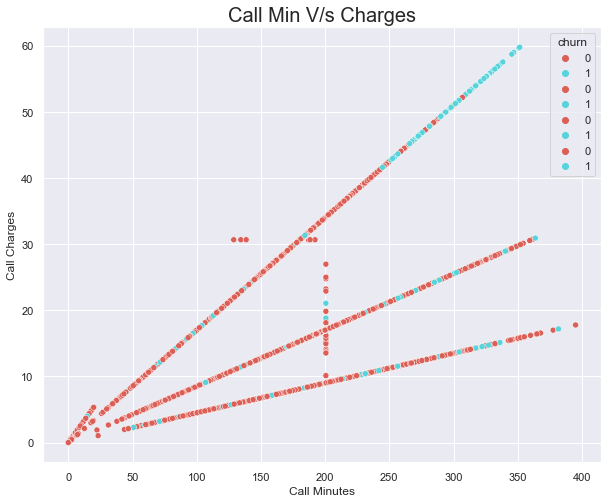

In [52]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="intl.mins", y="intl.charge", hue="churn", data=df,palette='hls')
sns.scatterplot(x="day.mins", y="day.charge", hue="churn", data=df,palette='hls')
sns.scatterplot(x="eve.mins", y="eve.charge", hue="churn", data=df,palette='hls')
sns.scatterplot(x="night.mins", y="night.charge", hue="churn", data=df,palette='hls')
plt.xlabel('Call Minutes')
plt.ylabel('Call Charges')
plt.title('Call Min V/s Charges',fontsize=20)
plt.show()

In [53]:
'''plt.figure(figsize=(10,8))
sns.scatterplot(x="night.mins", y="night.charge", hue="churn", data=df,palette='hls')
plt.show()'''

'plt.figure(figsize=(10,8))\nsns.scatterplot(x="night.mins", y="night.charge", hue="churn", data=df,palette=\'hls\')\nplt.show()'

**From the above plots, it is observed that higher the charges higher is the churn rate.**

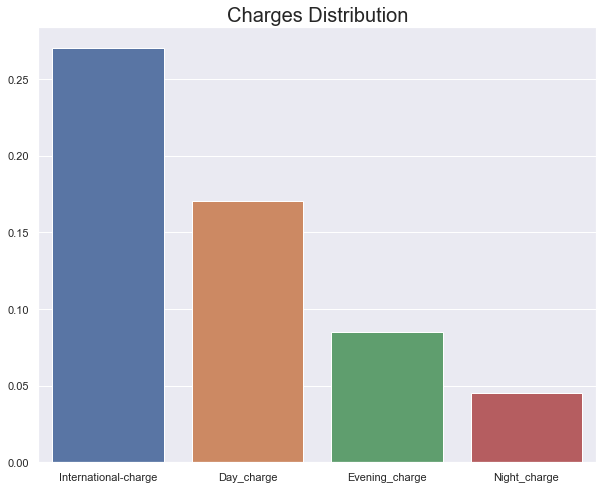

In [54]:
#Relation between overall call charge and overall call minutes
day_charge_perm = df['day.charge'].mean()/df['day.mins'].mean()
eve_charge_perm = df['eve.charge'].mean()/df['eve.mins'].mean()
night_charge_perm = df['night.charge'].mean()/df['night.mins'].mean()
intl_charge_perm= df['intl.charge'].mean()/df['intl.mins'].mean()

plt.figure(figsize=(10,8))
sns.barplot(x=['International-charge','Day_charge','Evening_charge','Night_charge'],y=[intl_charge_perm,day_charge_perm,eve_charge_perm,night_charge_perm])
plt.title('Charges Distribution',fontsize=20)
plt.show()

**It is observed that as International charges are very high as compared to other charges,it might be one of the reasons that the customers opting for international plan are churning at a higher rate.**

# Feature Engineering

In [55]:
#drop 'unnamed 0' column
df1 = df.drop(columns='Unnamed: 0')
df1.sample()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
1184,ME,area_code_510,69,0,0,0,9.7,3,2.62,194.2,122,33.01,242.1,81,20.58,215.8,80,9.71,2,0


In [56]:
#label encoding (label_encoder object knows how to understand word labels.)
#Convertin the predictor variable in a binary numeric variable
from sklearn import preprocessing
label_enc = preprocessing.LabelEncoder()
df1['state'] = label_enc.fit_transform(df1['state'])
df1['area.code'] = label_enc.fit_transform(df1['area.code'])
df1['voice.plan'] = label_enc.fit_transform(df1['voice.plan'])
df1['intl.plan'] = label_enc.fit_transform(df1['intl.plan'])
df1['churn'] = label_enc.fit_transform(df1['churn'])

In [57]:
##Normalization :  transforming numeric columns to a common scale
df_transformed = df1.copy()
# min-max normalization (numeric variables)
min_max_columns = ['state','area.code','account.length', 'intl.charge', 'day.charge','eve.charge','night.charge','voice.plan','voice.messages',
                   'intl.plan','intl.mins','intl.calls','day.mins','day.calls','eve.mins','eve.calls','night.mins',
                   'night.calls','customer.calls']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = df_transformed[column].min()
        # maximum value of the column
        max_column = df_transformed[column].max()
        # min max scaler
        df_transformed[column] = (df_transformed[column] - min_column) / (max_column - min_column)

In [58]:
df_transformed.sample(5)

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
1142,0.88,0.5,0.429752,0.0,0.000000,0.0,0.265,0.20,0.264815,0.302703,0.430303,0.302711,0.660159,0.488235,0.660304,0.373924,0.651429,0.374226,0.666667,1
3072,0.86,0.5,0.305785,0.0,0.000000,0.0,0.425,0.25,0.425926,0.867994,0.642424,0.867972,0.516910,0.676471,0.516985,0.595949,0.662857,0.595948,0.000000,1
4396,0.34,0.5,0.223140,1.0,0.711538,0.0,0.985,0.10,0.985185,0.561878,0.539394,0.561914,0.628815,0.829412,0.628923,0.793418,0.691429,0.793472,0.111111,0
8,0.36,0.0,0.479339,0.0,0.000000,0.0,0.435,0.20,0.435185,0.524893,0.587879,0.524933,0.966731,0.470588,0.967001,0.546329,0.514286,0.546427,0.111111,0
1860,0.94,0.0,0.256198,0.0,0.000000,0.0,0.370,0.35,0.370370,0.602276,0.648485,0.602242,0.747044,0.452941,0.747007,0.514684,0.617143,0.514913,0.000000,0


In [59]:
df_transformed.shape

(5000, 20)

<AxesSubplot:>

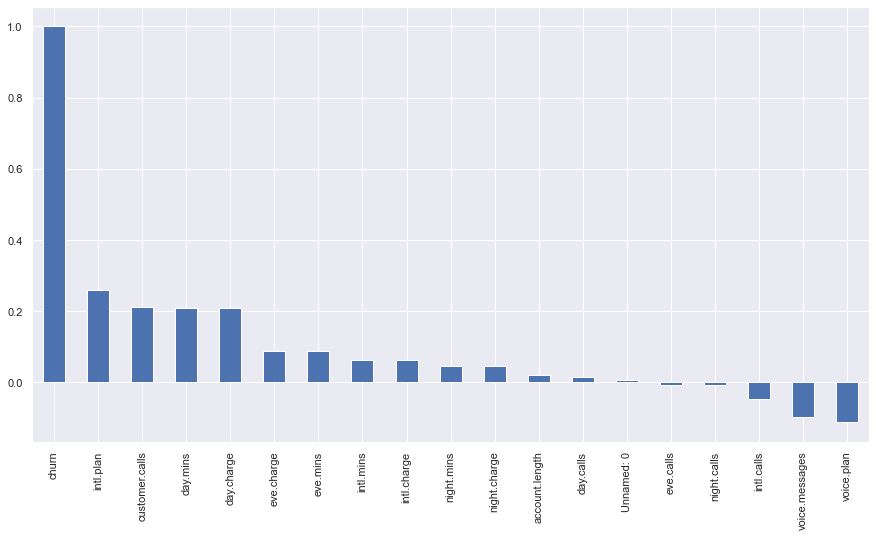

In [60]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

In [61]:
# Splitting the data into train and test sets

In [62]:
# select independent variables
X = df_transformed.drop(columns='churn')

# select dependent variables
y = df_transformed.loc[:, 'churn']

print(X.columns)

Index(['state', 'area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls'],
      dtype='object')


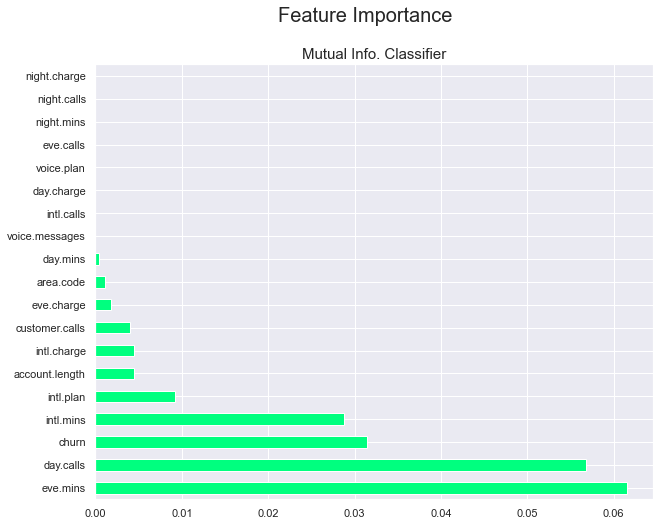

In [63]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
y = y.astype('int')
importances = mutual_info_classif(X,y)
plt.figure(figsize=(10,8))
feature_importance = pd.Series(importances,df1.columns[1:21])
feature_importance.nlargest(25).plot(kind='barh',color='springgreen')
plt.suptitle('Feature Importance',fontsize=20)
plt.title('Mutual Info. Classifier',fontsize=(15))
plt.show()

Hence, with less imporatnce we can drop day.mins,account.length,eve.calls,eve.charge,night.charge,customer.calls and area.code

In [64]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

y = y.astype('int')
# feature extraction
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_)

[0.0316296  0.02079662 0.03314235 0.02106565 0.01572409 0.07406406
 0.04246028 0.05162687 0.04564952 0.12646193 0.0332687  0.12781996
 0.05815939 0.03201285 0.05574343 0.03894988 0.03200217 0.03799903
 0.12142359]


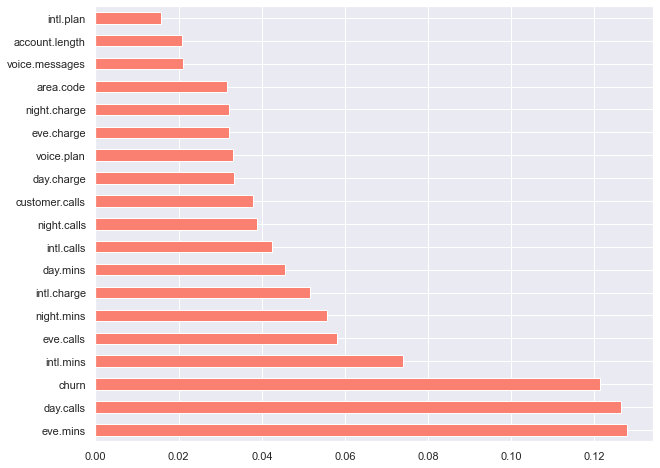

In [65]:
plt.figure(figsize=(10,8))
feat_importances=pd.Series(model.feature_importances_, index=df1.columns[1:21])
feat_importances.nlargest(20).plot(kind="barh",color='salmon')
plt.show()

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_cat = X.astype(int)
chi2_features = SelectKBest(chi2,k=4)
X_kbest_features=chi2_features.fit_transform(X_cat,y)
print('Number of original features:',X_cat.shape[1])
print('Number of reduced features:',X_kbest_features.shape[1])

Number of original features: 19
Number of reduced features: 4


In [67]:
#Adding new feature
df1['total.charges'] = df1['intl.charge']+df1['day.charge']+df1['eve.charge']+df1['night.charge']
df1.sample()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,...,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,total.charges
2186,32,1,41,0,0,0,10.9,2,2.94,232.1,...,39.46,327.1,88,27.8,226.5,119,10.19,3,1,80.39


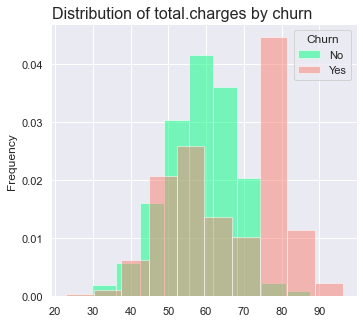

In [68]:
def histogram_plots(columns_to_plot, super_title):

    # set number of rows and number of columns
    no_of_cols = 2
    no_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * no_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(no_of_rows, no_of_cols, index)

        # histograms for each class (normalized histogram)
        df1[df1['churn']==0][column].plot(kind='hist', ax=ax, density=True, 
                                                       alpha=0.5, color='springgreen', label='No')
        df1[df1['churn']==1][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, color='salmon', label='Yes')
        
        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
        
        
charges = ['total.charges']
# histogram of costumer account columns 
histogram_plots(charges, '')

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   int32  
 1   area.code       5000 non-null   int32  
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   int64  
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   int64  
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   float64
 12  eve.mins        5000 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

In [70]:
X.sample(5)

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
1742,0.22,0.5,0.322314,0.0,0.000000,0.0,0.570,0.25,0.570370,0.119203,0.751515,0.119143,0.580148,0.558824,0.580395,0.602278,0.314286,0.602701,0.111111
744,0.52,0.5,0.318182,0.0,0.000000,0.0,0.455,0.25,0.455556,0.545377,0.739394,0.545348,0.663734,0.517647,0.663863,0.515190,0.491429,0.515476,0.111111
1225,0.88,0.5,0.301653,0.0,0.000000,0.0,0.570,0.15,0.570370,0.302703,0.509091,0.302711,0.385483,0.611765,0.385636,0.230127,0.462857,0.230163,0.111111
3088,0.00,0.5,0.409091,1.0,0.557692,0.0,0.445,0.15,0.444444,0.607681,0.769697,0.607597,0.483640,0.482353,0.483662,0.524557,0.571429,0.524479,0.111111
327,0.20,0.0,0.586777,1.0,0.634615,0.0,0.475,0.20,0.475926,0.680512,0.660606,0.680388,0.647512,0.658824,0.647687,0.395696,0.542857,0.395611,0.111111


In [71]:
df1.sample(5)

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,...,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,total.charges
1277,9,1,68,1,24,0,14.7,7,3.97,176.0,...,29.92,277.9,116,23.62,174.7,71,7.86,1,0,65.37
4238,14,1,135,0,0,0,6.6,1,1.78,247.2,...,42.02,168.7,122,14.34,169.8,100,7.64,0,0,65.78
480,11,0,166,0,0,0,11.6,6,3.13,181.4,...,30.84,253.8,54,21.57,112.3,94,5.05,1,0,60.59
2127,46,0,46,0,0,0,11.2,5,3.02,196.7,...,33.44,205.9,74,17.50,216.6,112,9.75,3,0,63.71
2361,19,1,66,0,0,0,10.5,3,2.84,116.4,...,19.79,95.6,74,8.13,181.5,94,8.17,3,0,38.93


In [72]:
# select independent variables
X1 = df1.drop(columns='churn')

# select dependent variables
y1 = df.loc[:, 'churn']

print(X1.columns)

Index(['state', 'area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls',
       'total.charges'],
      dtype='object')


In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, 
                                                    test_size=0.25,
                                                    random_state=40, 
                                                    shuffle=True)
print(X_train.shape)
print(X_test.shape)

(3750, 20)
(1250, 20)


# Model Building & Evaluation

In [104]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

In [75]:
def model(seed=2):

    models = []
    models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines', SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    
    return models

# create a list with all the algorithms we are going to assess
models = model()

In [76]:
from sklearn.metrics import accuracy_score
# test the accuracy of each model using default hyperparameters
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy 
    accuracy = accuracy_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: dummy_classifier, Accuracy: 0.8528)
Classifier: k_nearest_neighbors, Accuracy: 0.88)
Classifier: logistic_regression, Accuracy: 0.8536)
Classifier: support_vector_machines, Accuracy: 0.8576)
Classifier: random_forest, Accuracy: 0.9704)
Classifier: gradient_boosting, Accuracy: 0.9712)


In [77]:
from sklearn.model_selection import RandomizedSearchCV
# define the parameter grid
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search.fit(X_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 120, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 6}


In [78]:
from sklearn.metrics import confusion_matrix
# make the predictions
random_search_predictions = random_search.predict(X_test)

# construct the confusion matrix
confusion_matrix = confusion_matrix(y_test, random_search_predictions)

#confusion matrix
print('Confusion Matrix\n',confusion_matrix)

Confusion Matrix
 [[1065    1]
 [  34  150]]


In [79]:
# classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, random_search_predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1066
           1       0.99      0.82      0.90       184

    accuracy                           0.97      1250
   macro avg       0.98      0.91      0.94      1250
weighted avg       0.97      0.97      0.97      1250



In [80]:
# print the accuracy of the model
print('Model Accuracy : ',accuracy_score(y_test, random_search_predictions)*100)

Model Accuracy :  97.2


#  Model Building with 15 features

In [81]:
'''# droped Hence, Correlation is 1 between folowing variables
intl.mins & intl.charges,day.mins & day.charges,eve.mins & eve.charges,night.mins & night.charges
So, we can remove 4 of total variables from these 8. also droped categoricals'''

df2 = df1.drop(['state','area.code','intl.charge','day.charge','night.charge','eve.charge'],axis=1)
df2.shape

(5000, 15)

In [82]:
##Normalization :  transforming numeric columns to a common scale
df_transformed1 = df2.copy()
# min-max normalization (numeric variables)
min_max_columns = ['account.length','voice.plan','voice.messages','intl.plan','intl.mins','intl.calls','day.mins',
                   'day.calls','eve.mins','eve.calls','night.mins','night.calls','customer.calls']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = df_transformed[column].min()
        # maximum value of the column
        max_column = df_transformed[column].max()
        # min max scaler
        df_transformed[column] = (df_transformed[column] - min_column) / (max_column - min_column)

In [83]:
df_transformed1.sample(2)

,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn,total.charges
4199,70,0,0,0,7.9,4,229.3,110,118.2,89,155.0,105,1,0,58.14
1481,129,1,34,0,14.8,9,204.5,79,132.8,113,190.1,117,2,0,58.61


In [84]:
X2 = df_transformed1.drop(columns = 'churn')

# select dependent variables
y2 = df_transformed1.loc[:, 'churn']

print(X2.columns)

Index(['account.length', 'voice.plan', 'voice.messages', 'intl.plan',
       'intl.mins', 'intl.calls', 'day.mins', 'day.calls', 'eve.mins',
       'eve.calls', 'night.mins', 'night.calls', 'customer.calls',
       'total.charges'],
      dtype='object')


In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y2, 
                                                    test_size=0.25,
                                                    random_state=40, 
                                                    shuffle=True)
print(X_train.shape)
print(X_test.shape)

(3750, 14)
(1250, 14)


In [86]:
from sklearn.metrics import accuracy_score
# test the accuracy of each model using default hyperparameters
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy 
    accuracy = accuracy_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: dummy_classifier, Accuracy: 0.8528)
Classifier: k_nearest_neighbors, Accuracy: 0.8768)
Classifier: logistic_regression, Accuracy: 0.856)
Classifier: support_vector_machines, Accuracy: 0.8608)
Classifier: random_forest, Accuracy: 0.9696)
Classifier: gradient_boosting, Accuracy: 0.9696)


In [87]:
from sklearn.model_selection import RandomizedSearchCV
# define the parameter grid
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search.fit(X_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 120, 'min_samples_split': 3, 'max_features': 'log2', 'max_depth': 6}


In [88]:
from sklearn.metrics import confusion_matrix
# make the predictions
random_search_predictions = random_search.predict(X_test)

# construct the confusion matrix
confusion_matrix = confusion_matrix(y_test, random_search_predictions)

#confusion matrix
print('Confusion Matrix\n',confusion_matrix)

Confusion Matrix
 [[1065    1]
 [  35  149]]


In [89]:
# classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, random_search_predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1066
           1       0.99      0.81      0.89       184

    accuracy                           0.97      1250
   macro avg       0.98      0.90      0.94      1250
weighted avg       0.97      0.97      0.97      1250



In [90]:
# print the accuracy of the model
print('Model Accuracy : ',accuracy_score(y_test, random_search_predictions)*100)

Model Accuracy :  97.11999999999999


In [91]:
for i in names,results:
    print(i)

['dummy_classifier', 'k_nearest_neighbors', 'logistic_regression', 'support_vector_machines', 'random_forest', 'gradient_boosting']
[0.8528, 0.8768, 0.856, 0.8608, 0.9696, 0.9696]


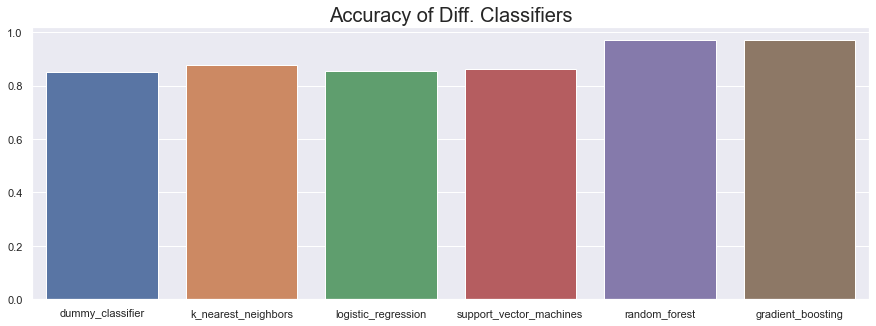

In [92]:
plt.figure(figsize=(15,5))
x = names
y = results
sns.barplot(x,y)
plt.title('Accuracy of Diff. Classifiers',fontsize=20)
plt.show()


# Model Building with 14 Features (Mutual ifo. classifier)

In [93]:
df3 = df1.drop(['day.mins','account.length','eve.calls','eve.charge','night.charge','customer.calls','area.code'],axis=1)
df3.shape

(5000, 14)

In [94]:
X3 = df3.drop(columns = 'churn')

# select dependent variables
y3 = df3.loc[:, 'churn']

print(X3.columns)

Index(['state', 'voice.plan', 'voice.messages', 'intl.plan', 'intl.mins',
       'intl.calls', 'intl.charge', 'day.calls', 'day.charge', 'eve.mins',
       'night.mins', 'night.calls', 'total.charges'],
      dtype='object')


In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X3, y3, 
                                                    test_size=0.25,
                                                    random_state=40, 
                                                    shuffle=True)
print(X_train.shape)
print(X_test.shape)

(3750, 13)
(1250, 13)


In [96]:
from sklearn.metrics import accuracy_score
# test the accuracy of each model using default hyperparameters
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy 
    accuracy = accuracy_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: dummy_classifier, Accuracy: 0.8528)
Classifier: k_nearest_neighbors, Accuracy: 0.8648)
Classifier: logistic_regression, Accuracy: 0.8512)
Classifier: support_vector_machines, Accuracy: 0.8528)
Classifier: random_forest, Accuracy: 0.9376)
Classifier: gradient_boosting, Accuracy: 0.9368)


In [97]:
from sklearn.model_selection import RandomizedSearchCV
# define the parameter grid
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search.fit(X_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 115, 'min_samples_split': 3, 'max_features': 'sqrt', 'max_depth': 5}


In [98]:
from sklearn.metrics import confusion_matrix
# make the predictions
random_search_predictions = random_search.predict(X_test)

# construct the confusion matrix
confusion_matrix = confusion_matrix(y_test, random_search_predictions)

#confusion matrix
print('Confusion Matrix\n',confusion_matrix)

Confusion Matrix
 [[1065    1]
 [  76  108]]


In [99]:
# classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, random_search_predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1066
           1       0.99      0.59      0.74       184

    accuracy                           0.94      1250
   macro avg       0.96      0.79      0.85      1250
weighted avg       0.94      0.94      0.93      1250



In [100]:
# print the accuracy of the model
print('Model Accuracy : ',accuracy_score(y_test, random_search_predictions)*100)

Model Accuracy :  93.84


# Deployment

In [102]:
'''# saving the model 
import pickle 
pickle_out = open("random_search_Clsfr.pkl", mode = "wb") 
pickle.dump(random_search, pickle_out) 
pickle_out.close()'''

'# saving the model \nimport pickle \npickle_out = open("random_search_Clsfr.pkl", mode = "wb") \npickle.dump(random_search, pickle_out) \npickle_out.close()'

In [103]:
df1.head()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,...,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,total.charges
0,16,1,128,1,25,0,10.0,3,2.70,265.1,...,45.07,197.4,99,16.78,244.7,91,11.01,1,0,75.56
1,35,1,107,1,26,0,13.7,3,3.70,161.6,...,27.47,195.5,103,16.62,254.4,103,11.45,1,0,59.24
2,31,1,137,0,0,0,12.2,5,3.29,243.4,...,41.38,121.2,110,10.30,162.6,104,7.32,0,0,62.29
3,35,0,84,0,0,1,6.6,7,1.78,299.4,...,50.90,61.9,88,5.26,196.9,89,8.86,2,0,66.80
4,36,1,75,0,0,1,10.1,3,2.73,166.7,...,28.34,148.3,122,12.61,186.9,121,8.41,3,0,52.09
